In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


In [2]:
weather = pd.read_csv('ready_to_use_data_for_regression.csv')
weather.keys()

Index(['Max.', 'Min.', 'Morn', 'Eve', 'Rain', 'Rainy Days ', 'PE', 'year',
       'month', 'day', 'Next_Max', 'Next_Min'],
      dtype='object')

In [3]:
df = pd.DataFrame(weather)
df

,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,year,month,day,Next_Max,Next_Min
0,21.0,13.5,78.0,48.0,0.0,0.0,0.43,2020,1,1,22.5,13.5
1,22.5,13.5,78.0,48.0,2.0,1.0,0.43,2020,1,2,21.5,15.5
2,21.5,15.5,78.0,48.0,0.0,0.0,0.43,2020,1,3,19.0,11.5
3,19.0,11.5,78.0,48.0,0.0,0.0,0.87,2020,1,4,23.0,8.0
4,23.0,8.0,78.0,48.0,0.0,0.0,1.74,2020,1,5,24.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,42.0,24.5,78.0,48.0,0.0,0.0,9.11,2020,5,16,42.0,24.0
4003,42.0,24.0,78.0,48.0,0.0,0.0,8.25,2020,5,17,42.5,23.5
4004,42.5,23.5,78.0,48.0,0.0,0.0,7.81,2020,5,18,41.0,21.5
4005,41.0,21.5,78.0,48.0,0.0,0.0,9.55,2020,5,19,43.0,21.0


In [4]:
x = df.drop(columns=['Next_Min' , 'Next_Max'])
y = df[['Next_Min', 'Next_Max']]

x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8 , random_state=42)


In [5]:
model = MultiOutputRegressor(RandomForestRegressor(random_state=42, n_estimators=100))
model.fit(x_train , y_train)

,estimator,RandomForestR...ndom_state=42)
,n_jobs,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [6]:
y_predicted = model.predict(x_test)

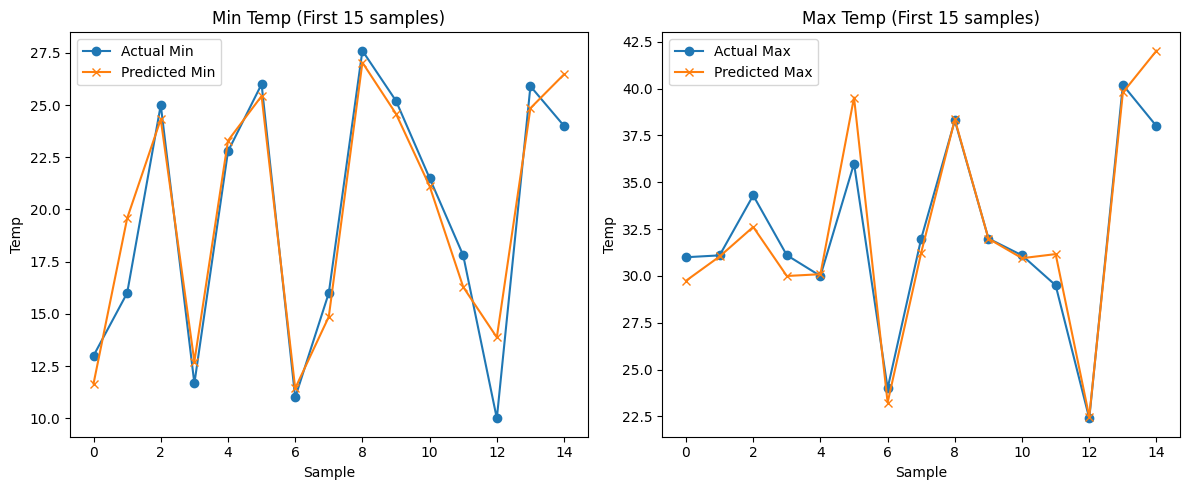

In [7]:
# Plot only first 100 points
n = 15

plt.figure(figsize=(12, 5))

# Min Temp
plt.subplot(1, 2, 1)
plt.plot(y_test['Next_Min'].values[:n], label='Actual Min', marker='o')
plt.plot(y_predicted[:n, 0], label='Predicted Min', marker='x')
plt.title('Min Temp (First 15 samples)')
plt.xlabel('Sample')
plt.ylabel('Temp')
plt.legend()

# Max Temp
plt.subplot(1, 2, 2)
plt.plot(y_test['Next_Max'].values[:n], label='Actual Max', marker='o')
plt.plot(y_predicted[:n, 1], label='Predicted Max', marker='x')
plt.title('Max Temp (First 15 samples)')
plt.xlabel('Sample')
plt.ylabel('Temp')
plt.legend()

plt.tight_layout()
plt.show()

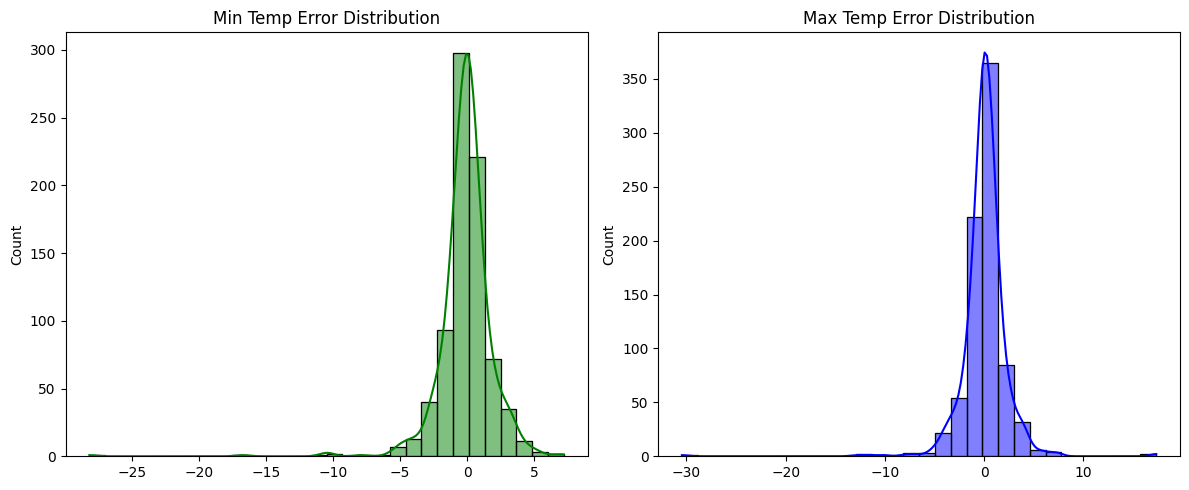

In [8]:
min_error = y_test['Next_Min'].values - y_predicted[:, 0]
max_error = y_test['Next_Max'].values - y_predicted[:, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(min_error, bins=30, kde=True, color='green')
plt.title('Min Temp Error Distribution')

plt.subplot(1, 2, 2)
sns.histplot(max_error, bins=30, kde=True, color='blue')
plt.title('Max Temp Error Distribution')

plt.tight_layout()
plt.show()

In [9]:
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)

print("Results :")
print(f"MAE: {mae:.2f} °C")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} °C")
print(f"R² Score: {r2:.2f}")

Results :
MAE: 1.28 °C
MSE: 4.94
RMSE: 2.22 °C
R² Score: 0.86
